<a href="https://colab.research.google.com/github/SmrutiRanjan27/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Smruti_Ranjan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [103]:
warnings.filterwarnings('ignore')

In [104]:
file_dir = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 4/Capstone Project/data/'
df = pd.read_csv(file_dir + 'data_cardiovascular_risk.csv')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [106]:
# lets check for distribution of classes
class_0_count, class_1_count = df[df['TenYearCHD']==0].shape[0], df[df['TenYearCHD']==1].shape[0]
print('Class imbalance = %d: %d' % (class_0_count, class_1_count)) # need to address this after some EDA

Class imbalance = 2879: 511


There are 17 columns in the dataset. Out of which 15 are attributes/features, column 0 is the id of each sample, and column 16 is the target variable. Before doing some data cleaning and EDA, lets split our dataset into train and test data.<br>

In [107]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['TenYearCHD'], random_state = 1)

In [108]:
train_df.shape

(2712, 17)

In [109]:
test_df.shape

(678, 17)

### **Education**

In [110]:
train_df.education.unique()

array([ 2.,  3.,  1.,  4., nan])

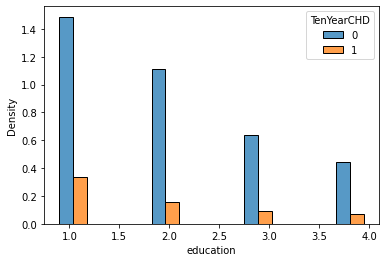

In [111]:
sns.histplot(x='education',hue='TenYearCHD',data=train_df, stat='density', multiple="dodge", shrink=1.2)

In [112]:
ed_fill = train_df['education'].median()
print(ed_fill)
train_df['education'] = train_df['education'].fillna(ed_fill)

2.0


### **Age**

In [113]:
train_df.age.unique()

array([49, 51, 57, 59, 52, 60, 48, 40, 54, 39, 56, 44, 42, 43, 41, 45, 37,
       61, 53, 62, 47, 36, 55, 34, 46, 64, 38, 58, 63, 35, 50, 65, 67, 66,
       68, 33, 69, 70, 32])

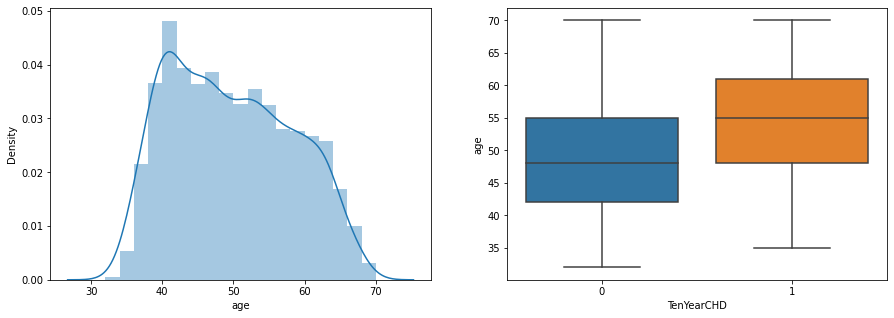

In [114]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_df['age'], ax=axes[0])
sns.boxplot(y='age',x='TenYearCHD',data=train_df, ax=axes[1])

### **Sex**

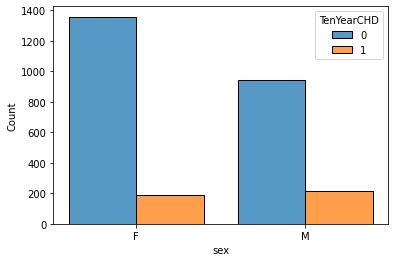

In [115]:
sns.histplot(x='sex',hue='TenYearCHD',data=train_df, stat='count', multiple="dodge", shrink=0.8)

**Higher fraction of males are prone to cardiovascular diseases!**

### **Smoking**

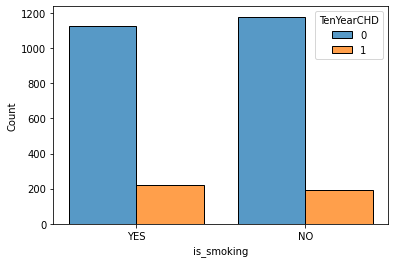

In [116]:
sns.histplot(x='is_smoking',hue='TenYearCHD',data=train_df, stat='count', multiple="dodge", shrink=0.8)

We can observe that comparatively, smokers are slightly more prone to positive cases!

### **Cigarrettes per Day**

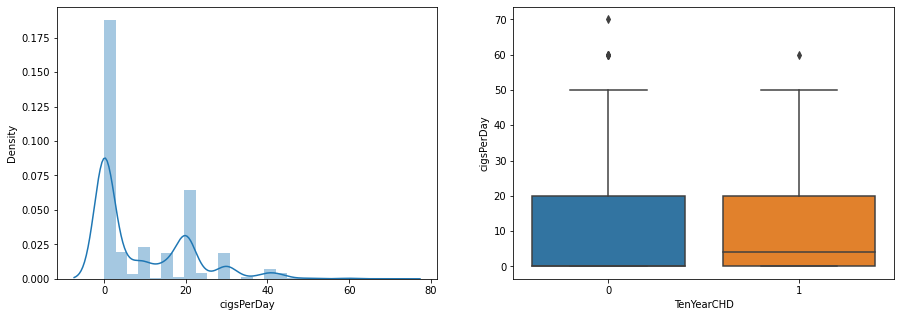

In [117]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_df['cigsPerDay'], ax=axes[0])
sns.boxplot(y='cigsPerDay',x='TenYearCHD',data=train_df, ax=axes[1])

**We see that the median is slighlty higher for the positive cases, which means people who smoke higher number of cigarette per day, tend to show cardio-vascular disease!**

In [118]:
cig_fill = train_df['cigsPerDay'].median()
print(cig_fill)
train_df['cigsPerDay'] = train_df['cigsPerDay'].fillna(cig_fill)

0.0


### **BP Meds**

In [119]:
train_df.BPMeds.unique()

array([ 0.,  1., nan])

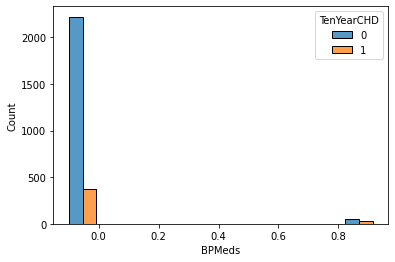

In [120]:
sns.histplot(x='BPMeds',hue='TenYearCHD',data=train_df, stat='count', multiple="dodge", shrink=1.2)

In [121]:
meds_fill = train_df['BPMeds'].mode()
print(meds_fill)
train_df['BPMeds'] = train_df['BPMeds'].fillna(meds_fill)

0    0.0
dtype: float64


### Heart **Rate**

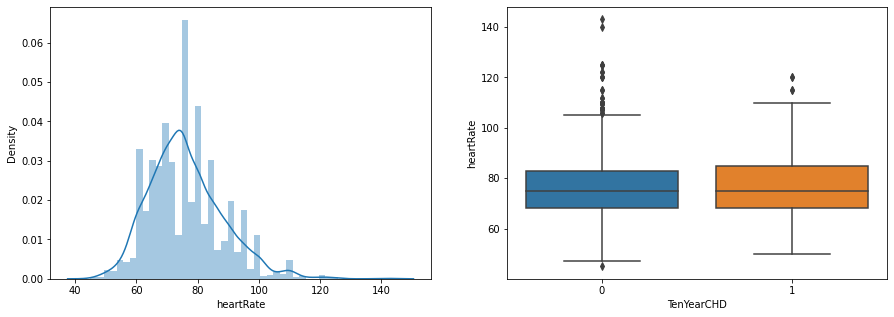

In [122]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_df['heartRate'], ax=axes[0])
sns.boxplot(y='heartRate',x='TenYearCHD',data=train_df, ax=axes[1])

In [123]:
hr_fill = train_df['heartRate'].mode()
print(hr_fill)
train_df['heartRate'] = train_df['heartRate'].fillna(hr_fill)

0    75.0
dtype: float64
